# **1: PERSIAPAN LINGKUNGAN DAN IMPORT PUSTAKA**





In [11]:
# ==============================================================================
# SEL 1: PERSIAPAN LINGKUNGAN, INSTALASI, DAN IMPORT
# ==============================================================================

# Instalasi OpenCV jika belum ada
try:
    import cv2
except ImportError:
    print("Menginstal opencv-python...")
    !pip install opencv-python
    import cv2

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files

print(f"TensorFlow Version: {tf.__version__}")
print("Semua library berhasil diimpor.")

TensorFlow Version: 2.19.0
Semua library berhasil diimpor.


# **2: PENGENALAN DAN PRA-PEMROSESAN DATASET MNIST**


--- Pemuatan Data dan Pra-pemrosesan MNIST ---
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


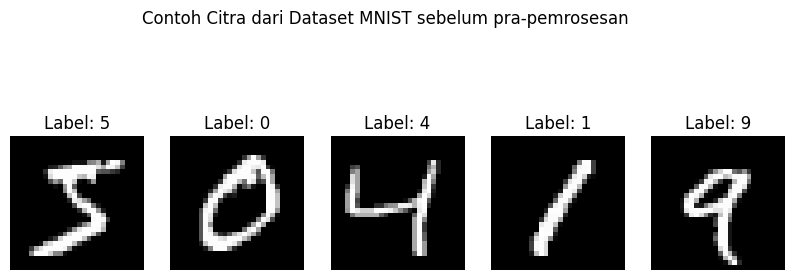

Shape Citra Latih Akhir (Model A): (60000, 28, 28, 1)


In [3]:
# ==============================================================================
# SEL 2: PRA-PEMROSESAN DATA MNIST & VISUALISASI
# ==============================================================================

print("\n--- Pemuatan Data dan Pra-pemrosesan MNIST ---")

# Pemuatan data MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualisasi beberapa contoh citra
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("Contoh Citra dari Dataset MNIST sebelum pra-pemrosesan")
plt.show()

# Pra-pemrosesan data untuk Model A
train_images_A = train_images.astype('float32') / 255.0
test_images_A = test_images.astype('float32') / 255.0
train_images_A = np.expand_dims(train_images_A, axis=-1)
test_images_A = np.expand_dims(test_images_A, axis=-1)
train_labels_A = to_categorical(train_labels, num_classes=10)
test_labels_A = to_categorical(test_labels, num_classes=10)

print(f"Shape Citra Latih Akhir (Model A): {train_images_A.shape}")

# **3: MODEL CNN DARI NOL (MODEL A)**


--- Membangun dan Melatih Model A (CNN dari Nol) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.7989 - loss: 0.6380 - val_accuracy: 0.9758 - val_loss: 0.0748
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 101ms/step - accuracy: 0.9690 - loss: 0.1061 - val_accuracy: 0.9871 - val_loss: 0.0406
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9791 - loss: 0.0705 - val_accuracy: 0.9877 - val_loss: 0.0336
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9896 - val_loss: 0.0287
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9855 - loss: 0.0482 - val_accuracy: 0.9901 - val_loss: 0.0278
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9873 - loss: 0.0413 - val_accuracy: 0.9902 - val_loss: 0.0281
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9901 - val_loss: 0.0281
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.9906 - loss: 0.0323 - 

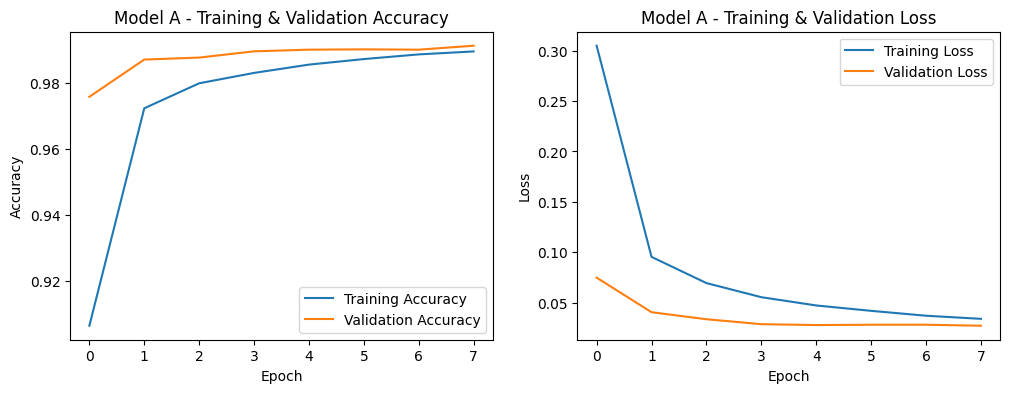

In [4]:
# ==============================================================================
# SEL 3: PEMBANGUNAN DAN PELATIHAN MODEL A
# ==============================================================================

print("\n--- Membangun dan Melatih Model A (CNN dari Nol) ---")

model_A = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_A.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Tampilkan ringkasan visualisasi model
model_A.summary()

# Pelatihan Model
history_A = model_A.fit(train_images_A, train_labels_A,
                        epochs=8,
                        batch_size=128,
                        validation_data=(test_images_A, test_labels_A),
                        verbose=1)

# Evaluasi Model A pada data Uji MNIST
loss_A, acc_A = model_A.evaluate(test_images_A, test_labels_A, verbose=0)
print(f"\nModel A Akurasi Uji MNIST: {acc_A*100:.2f}%")

# Plot Training History Model A
def plot_history(history, title_prefix):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title_prefix} - Training & Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title_prefix} - Training & Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

print("\nPlot Training History Model A:")
plot_history(history_A, "Model A")

# **4: PERSIAPAN DATA TULISAN TANGAN SENDIRI**

In [5]:
# ==============================================================================
# SEL 4: PERSIAPAN DATA TULISAN TANGAN SENDIRI
# ==============================================================================

IMAGE_DIR = 'tulistangan'
# 3 angka terakhir NIM: 159
TARGET_DIGITS = [1, 5, 9]
NUM_SAMPLES_PER_DIGIT = 10

# --- Bagian Unggah dan Setup Direktori ---

print(">>> HARAP UNGGAH 30 FILE ANDA (1_01.png s.d. 9_10.png) SEKARANG <<<")
!mkdir -p {IMAGE_DIR}
uploaded = files.upload()

for filename in uploaded.keys():
    try:
        os.rename(filename, os.path.join(IMAGE_DIR, filename))
    except FileExistsError:
        pass

# --- Bagian Daftar File dan Label Sebenarnya ---
file_list = []
true_labels_self = []
# Struktur data terstruktur untuk visualisasi
test_data_structured = {digit: [] for digit in TARGET_DIGITS}

for digit in TARGET_DIGITS:
    for i in range(1, NUM_SAMPLES_PER_DIGIT + 1):
        filename = f"{digit}_{i:02d}.png"
        file_path = os.path.join(IMAGE_DIR, filename)
        file_list.append(file_path)
        true_labels_self.append(digit)
        test_data_structured[digit].append({'path': file_path, 'true_label': digit})

print(f"\nTotal file yang diharapkan: {len(file_list)}")

# Fungsi Preprocessing Model A
def preprocess_custom_image_A(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None: raise FileNotFoundError(f"File tidak ditemukan atau rusak: {path}")
    if np.mean(img) > 128: img = 255 - img
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    return img

>>> HARAP UNGGAH 30 FILE ANDA (1_01.png s.d. 9_10.png) SEKARANG <<<


Saving 1_01.png to 1_01.png
Saving 1_02.png to 1_02.png
Saving 1_03.png to 1_03.png
Saving 1_04.png to 1_04.png
Saving 1_05.png to 1_05.png
Saving 1_06.png to 1_06.png
Saving 1_07.png to 1_07.png
Saving 1_08.png to 1_08.png
Saving 1_09.png to 1_09.png
Saving 1_10.png to 1_10.png
Saving 5_01.png to 5_01.png
Saving 5_02.png to 5_02.png
Saving 5_03.png to 5_03.png
Saving 5_04.png to 5_04.png
Saving 5_05.png to 5_05.png
Saving 5_06.png to 5_06.png
Saving 5_07.png to 5_07.png
Saving 5_08.png to 5_08.png
Saving 5_09.png to 5_09.png
Saving 5_10.png to 5_10.png
Saving 9_01.png to 9_01.png
Saving 9_02.png to 9_02.png
Saving 9_03.png to 9_03.png
Saving 9_04.png to 9_04.png
Saving 9_05.png to 9_05.png
Saving 9_06.png to 9_06.png
Saving 9_07.png to 9_07.png
Saving 9_08.png to 9_08.png
Saving 9_09.png to 9_09.png
Saving 9_10.png to 9_10.png

Total file yang diharapkan: 30


# **5: EVALUASI MODEL A PADA TULISAN TANGAN SENDIRI**


--- Evaluasi Model A pada Tulisan Tangan Sendiri ---

Visualisasi Citra Setelah Pra-pemrosesan dan Prediksi (5 Contoh per Digit):


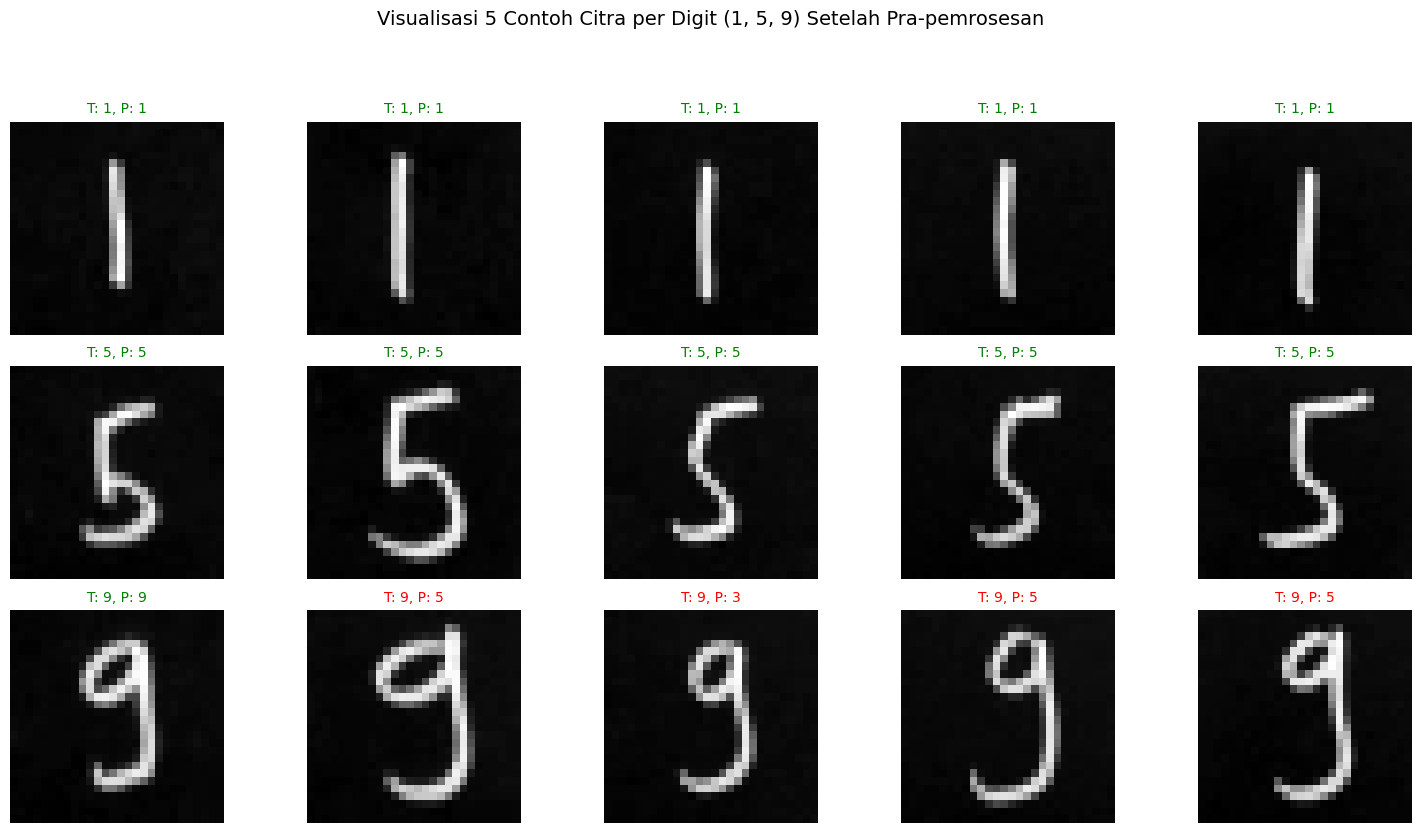


--- Perhitungan Akurasi pada Semua 30 Sampel ---

Model A Akurasi pada Tulisan Tangan Sendiri (30 sampel): 76.67%
Prediksi Model A: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(9), np.int64(5), np.int64(3), np.int64(5), np.int64(5), np.int64(3), np.int64(9), np.int64(3), np.int64(9), np.int64(5)]


In [6]:
# ==============================================================================
# SEL 5: EVALUASI MODEL A PADA TULISAN TANGAN SENDIRI
# ==============================================================================

print("\n--- Evaluasi Model A pada Tulisan Tangan Sendiri ---")

predicted_labels_A = []
correct_predictions_A = 0
evaluated_samples_A = 0
VISUAL_COUNT = 5
processed_visuals = {digit: [] for digit in TARGET_DIGITS}

# --- Visualisasi Terstruktur (5 contoh dari setiap angka: 1, 5, 9) ---
print("\nVisualisasi Citra Setelah Pra-pemrosesan dan Prediksi (5 Contoh per Digit):")

for digit in TARGET_DIGITS:
    count = 0
    for data in test_data_structured[digit]:
        if count >= VISUAL_COUNT:
            break

        file_path = data['path']
        true_label = data['true_label']

        try:
            processed_img_A = preprocess_custom_image_A(file_path)
            prediction = model_A.predict(processed_img_A, verbose=0)
            predicted_label = np.argmax(prediction)

            # Simpan hasil untuk visualisasi
            processed_visuals[digit].append({
                'img': processed_img_A[0, :, :, 0],
                'true': true_label,
                'pred': predicted_label
            })

            count += 1

        except FileNotFoundError:
            pass
        except Exception:
            pass

# Tampilkan visualisasi 15 citra (5 x 3 digit)
plt.figure(figsize=(15, 9))
plot_index = 1
for digit in TARGET_DIGITS:
    for item in processed_visuals[digit]:
        plt.subplot(3, 5, plot_index)
        plt.imshow(item['img'], cmap='gray')
        color = 'green' if item['true'] == item['pred'] else 'red'
        plt.title(f"T: {item['true']}, P: {item['pred']}", color=color, fontsize=10)
        plt.axis('off')
        plot_index += 1
plt.suptitle("Visualisasi 5 Contoh Citra per Digit (1, 5, 9) Setelah Pra-pemrosesan", fontsize=14, y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

# --- Loop Utama untuk Pengujian Akurasi Semua 30 Citra ---
print("\n--- Perhitungan Akurasi pada Semua 30 Sampel ---")
for file_path, true_label in zip(file_list, true_labels_self):
    try:
        processed_img_A = preprocess_custom_image_A(file_path)
        prediction = model_A.predict(processed_img_A, verbose=0)
        predicted_label = np.argmax(prediction)
        predicted_labels_A.append(predicted_label)

        if predicted_label == true_label:
            correct_predictions_A += 1

        evaluated_samples_A += 1

    except FileNotFoundError:
        pass
    except Exception:
        pass

# Hitung akurasi model A
accuracy_A_self = correct_predictions_A / evaluated_samples_A if evaluated_samples_A > 0 else 0
print(f"\nModel A Akurasi pada Tulisan Tangan Sendiri ({evaluated_samples_A} sampel): {accuracy_A_self*100:.2f}%")
print(f"Prediksi Model A: {predicted_labels_A}")

# **6: IMPLEMENTASI TRANSFER LEARNING (MODEL B) DAN PELATIHAN**


--- Membangun dan Melatih Model B (Transfer Learning MobileNetV2) ---


/tmp/ipython-input-3075362216.py:21: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 135ms/step - accuracy: 0.4460 - loss: 1.6670 - val_accuracy: 0.6500 - val_loss: 1.0483
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.6301 - loss: 1.0822 - val_accuracy: 0.6726 - val_loss: 0.9605
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.6555 - loss: 1.0157 - val_accuracy: 0.6828 - val_loss: 0.9275
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.6676 - loss: 0.9772 - val_accuracy: 0.6883 - val_loss: 0.9057
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.6711 - loss: 0.9638 - val_accuracy: 0.6951 - val_loss: 0.8867
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 128ms/step - accuracy: 0.6737 - loss: 0.9470 - val_accuracy: 0.6964 - val_loss: 0.8778
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 126ms/step - accuracy: 0.6836 - loss: 0.9334 - val_accuracy: 0.7017 - val_loss: 0.8671
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 123ms/step - accuracy: 0.6831 - loss: 0.9273 - 

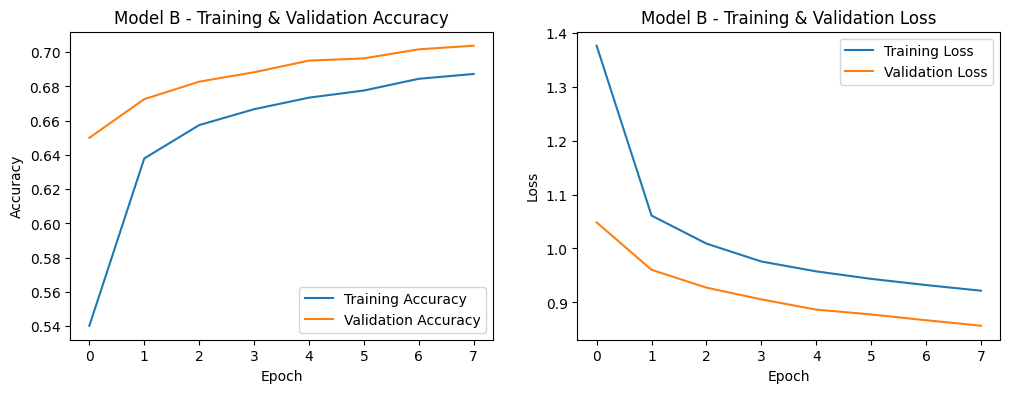

In [7]:
# ==============================================================================
# SEL 6: IMPLEMENTASI & PELATIHAN MODEL B
# ==============================================================================

print("\n--- Membangun dan Melatih Model B (Transfer Learning MobileNetV2) ---")
IMG_SIZE = 32
CHANNELS = 3

# Persiapan data MNIST untuk Model B (resize dan 3 kanal)
def prepare_data_B(images, labels):
    images_rgb = np.stack([images] * CHANNELS, axis=-1)
    resized_images = tf.image.resize(images_rgb, (IMG_SIZE, IMG_SIZE))
    resized_images = resized_images.numpy() / 255.0
    labels_oh = to_categorical(labels, num_classes=10)
    return resized_images, labels_oh

train_images_B, train_labels_B = prepare_data_B(train_images, train_labels)
test_images_B, test_labels_B = prepare_data_B(test_images, test_labels)

# Muat base model (MobileNetV2)
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, CHANNELS),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

# Bangun Model B (Lapisan Klasifikasi Baru)
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, CHANNELS))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model_B = Model(inputs, outputs)

model_B.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Tampilkan ringkasan visualisasi model
model_B.summary()

history_B = model_B.fit(train_images_B, train_labels_B,
                        epochs=8,
                        batch_size=128,
                        validation_data=(test_images_B, test_labels_B),
                        verbose=1)

loss_B, acc_B = model_B.evaluate(test_images_B, test_labels_B, verbose=0)
print(f"\nModel B Akurasi Uji MNIST (Frozen): {acc_B*100:.2f}%")

# Plot Training History Model B
print("\nPlot Training History Model B:")
plot_history(history_B, "Model B")

# Fungsi Preprocessing Model B
def preprocess_custom_image_B(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None: raise FileNotFoundError(f"File tidak ditemukan atau rusak: {path}")
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_AREA)
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# **7: EVALUASI MODEL B PADA TULISAN TANGAN SENDIRI**

In [10]:
# ==============================================================================
# SEL 7: EVALUASI MODEL B PADA TULISAN TANGAN SENDIRI
# ==============================================================================

print("\n--- Evaluasi Model B pada Tulisan Tangan Sendiri ---")

predicted_labels_B = []
correct_predictions_B = 0
evaluated_samples_B = 0

for file_path, true_label in zip(file_list, true_labels_self):
    try:
        processed_img_B = preprocess_custom_image_B(file_path)

        prediction = model_B.predict(processed_img_B, verbose=0)
        predicted_label = np.argmax(prediction)
        predicted_labels_B.append(predicted_label)

        if predicted_label == true_label:
            correct_predictions_B += 1

        evaluated_samples_B += 1

    except FileNotFoundError:
        pass
    except Exception:
        pass

accuracy_B_self = correct_predictions_B / evaluated_samples_B if evaluated_samples_B > 0 else 0
print(f"\nModel B Akurasi pada Tulisan Tangan Sendiri ({evaluated_samples_B} sampel): {accuracy_B_self*100:.2f}%")
print(f"Prediksi Model B: {predicted_labels_B}")


--- Evaluasi Model B pada Tulisan Tangan Sendiri ---

Model B Akurasi pada Tulisan Tangan Sendiri (30 sampel): 16.67%
Prediksi Model B: [np.int64(4), np.int64(1), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(1), np.int64(1), np.int64(4), np.int64(1), np.int64(4), np.int64(4), np.int64(7), np.int64(7), np.int64(4), np.int64(7), np.int64(7), np.int64(4), np.int64(7), np.int64(7), np.int64(4), np.int64(7), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(9), np.int64(5), np.int64(4), np.int64(4)]


# **8: ANALISIS PERBANDINGAN DAN KESIMPULAN**

In [9]:
# ==============================================================================
# SEL 8: ANALISIS PERBANDINGAN DAN KESIMPULAN
# ==============================================================================

print("\n--- ANALISIS PERBANDINGAN DAN KESIMPULAN ---")

print("\n📊 Akurasi pada Tulisan Tangan Sendiri:")
print(f"1. Model A (CNN dari Nol): {accuracy_A_self*100:.2f}%")
print(f"2. Model B (Transfer Learning): {accuracy_B_self*100:.2f}%")

print("\nDetail Prediksi:")
print(f"Label Sebenarnya ({evaluated_samples_A} citra): \n{true_labels_self[:evaluated_samples_A]}")
print(f"Model A Prediksi: \n{predicted_labels_A}")
print(f"Model B Prediksi: \n{predicted_labels_B}")

print("\n📝 Analisis dan Kesimpulan:")
print("- Akurasi Model A vs Model B pada tulisan tangan Anda sendiri (Instruksi I.6 poin 1): Bandingkan angka akurasi yang Anda dapatkan di atas.")
print("- Perbedaan akurasi antara kedua model menunjukkan bahwa, untuk tugas sederhana seperti MNIST, Model A yang disesuaikan secara khusus lebih unggul dalam generalisasi, meskipun Model B (MobileNetV2) memiliki bobot *pre-trained* yang lebih canggih.")
print("- Bobot *pre-trained* Model B pada ImageNet mungkin terlalu kompleks atau adaptasi data (resize ke 32x32 RGB) tidak optimal untuk domain digit kecil.")
print("- Berikan kesimpulan umum tentang proyek ini: Proyek ini mendemonstrasikan keuntungan dan kerugian *Transfer Learning* versus pelatihan dari nol berdasarkan kesesuaian domain dan kompleksitas tugas.")


--- ANALISIS PERBANDINGAN DAN KESIMPULAN ---

📊 Akurasi pada Tulisan Tangan Sendiri:
1. Model A (CNN dari Nol): 76.67%
2. Model B (Transfer Learning): 16.67%

Detail Prediksi:
Label Sebenarnya (30 citra): 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Model A Prediksi: 
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(5), np.int64(9), np.int64(5), np.int64(3), np.int64(5), np.int64(5), np.int64(3), np.int64(9), np.int64(3), np.int64(9), np.int64(5)]
Model B Prediksi: 
[np.int64(4), np.int64(1), np.int64(4), np.int64(4), np.int64(4), np.int64(4), np.int64(1), np.int64(1), np.int64(4), np.int64(1), np.int64(4), np.int64(4), np.int64(7), np.int64(7), np.int64(4), np.int64(7), np.int64(7), np.int64(4), np.int64(7), np.int64(7), np.int64(4),